# 数据探索：电商订单数据的基本预处理

## 1、判断数据来源、理解电商数据特征与标签

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('abnormal_orders.txt')
data.head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [3]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

In [4]:
data.shape

(134190, 14)

In [5]:
# 更换列名为中文
data.columns = ['订单ID','下单日期','下单时间','商品一级类别','商品所属渠道','商品ID',
                '品牌','订单金额','商品销售数量','订单渠道','支付方式','下单用户ID','城市','异常']

In [6]:
data.columns.to_list()

['订单ID',
 '下单日期',
 '下单时间',
 '商品一级类别',
 '商品所属渠道',
 '商品ID',
 '品牌',
 '订单金额',
 '商品销售数量',
 '订单渠道',
 '支付方式',
 '下单用户ID',
 '城市',
 '异常']

In [7]:
data.head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


#### 标签探索

In [8]:
data['异常'].value_counts()   # 0 - 正常订单    1 - 异常

0    105733
1     28457
Name: 异常, dtype: int64

In [9]:
(data['异常'] == 1).sum()

28457

In [10]:
(data['异常'] == 1).sum() / data.shape[0]  # 样本不均衡，但不均衡的程度较轻

0.2120649824875177

#### 下单日期

In [11]:
data['下单日期'].value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-01-31      2
2013-03-31      2
2013-05-31      2
Name: 下单日期, Length: 364, dtype: int64

#### 订单ID

In [12]:
# 订单数据的ID一般不会有重复值，先确认一下ID是否是唯一ID
data['订单ID'].duplicated().sum()

19212

#### 标签很可能是交易异常吗，而非订单异常

###### 商品一级类别

In [13]:
data['商品一级类别'].value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: 商品一级类别, dtype: int64

#### 商品所属渠道

In [14]:
data['商品所属渠道'].value_counts()

GO     91170
POP    43020
Name: 商品所属渠道, dtype: int64

In [15]:
(data['商品所属渠道'] == 'GO').sum() / data.shape[0]

0.6794097920858484

#### 订单渠道

In [16]:
data['订单渠道'].value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: 订单渠道, dtype: int64

#### 支付方式

In [17]:
data['支付方式'].value_counts()

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: 支付方式, dtype: int64

#### 城市

In [18]:
data['城市'].value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
果洛州            1
昌都地区           1
四川省其他城市        1
江西省其他城市        1
神农架林区          1
Name: 城市, Length: 365, dtype: int64

#### 查看数据的其他信息

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    134190 non-null  int64  
 1   下单日期    134190 non-null  object 
 2   下单时间    134190 non-null  object 
 3   商品一级类别  132800 non-null  object 
 4   商品所属渠道  134190 non-null  object 
 5   商品ID    134190 non-null  int64  
 6   品牌      133418 non-null  object 
 7   订单金额    134189 non-null  float64
 8   商品销售数量  134190 non-null  int64  
 9   订单渠道    134190 non-null  object 
 10  支付方式    134190 non-null  object 
 11  下单用户ID  134190 non-null  object 
 12  城市      134188 non-null  object 
 13  异常      134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


In [20]:
data.select_dtypes(include='int64').head()

,订单ID,商品ID,商品销售数量,异常
0,4277880103,8000001215,1000,0
1,4283851335,8002042497,200,1
2,4277700101,7000000960,160,1
3,4276537082,8001992420,100,1
4,4281111595,8002199518,100,1


#### 2、缺失值处理 ：信息缺失与异常有关吗？

In [21]:
data.isnull().sum()

订单ID         0
下单日期         0
下单时间         0
商品一级类别    1390
商品所属渠道       0
商品ID         0
品牌         772
订单金额         1
商品销售数量       0
订单渠道         0
支付方式         0
下单用户ID       0
城市           2
异常           0
dtype: int64

In [22]:
for  i in ['商品一级类别','品牌']:
    ratio1 = 100 * data.loc[data[i].isnull(),'异常'].sum() / data[i].isnull().sum()
    print('缺少({})的样本中异常样本占比为{:.3f}%'.format(i,ratio1))

缺少(商品一级类别)的样本中异常样本占比为11.727%
缺少(品牌)的样本中异常样本占比为20.984%


In [23]:
for i in ['商品一级类别','品牌']:
    ratio2 = 100 * data.loc[data[i].isnull(),'异常'].sum() / (data['异常'] == 1).sum()
    print('全部交易异常样本中，缺少（{}）的异常样本占比为{:.3f}%'.format(i,ratio2))

全部交易异常样本中，缺少（商品一级类别）的异常样本占比为0.573%
全部交易异常样本中，缺少（品牌）的异常样本占比为0.569%


In [24]:
data.dropna(how='any',inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    132761 non-null  int64  
 1   下单日期    132761 non-null  object 
 2   下单时间    132761 non-null  object 
 3   商品一级类别  132761 non-null  object 
 4   商品所属渠道  132761 non-null  object 
 5   商品ID    132761 non-null  int64  
 6   品牌      132761 non-null  object 
 7   订单金额    132761 non-null  float64
 8   商品销售数量  132761 non-null  int64  
 9   订单渠道    132761 non-null  object 
 10  支付方式    132761 non-null  object 
 11  下单用户ID  132761 non-null  object 
 12  城市      132761 non-null  object 
 13  异常      132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


In [26]:
data.index = range(data.shape[0])

In [27]:
data.shape[0]

132761

In [28]:
(data['异常'] == 1).sum()

28284

#### 3、重复值处理：订单重复背后隐藏的问题

In [29]:
data.duplicated().sum()

8

In [30]:
data.drop_duplicates(inplace=True)

#### '下单日期'应删除

In [31]:
data['订单ID'].value_counts().sort_values(ascending=False).head()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
Name: 订单ID, dtype: int64

In [34]:
data.loc[data['订单ID'] == 4279118253,:].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
95213,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0


In [35]:
data[data['订单ID'] == 4269390206].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0


In [36]:
data.drop(columns='下单日期',inplace=True)

In [37]:
data.duplicated().sum()

1471

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.index = range(data.shape[0])

In [40]:
data.shape

(131282, 13)

#### '订单ID'应保留

In [41]:
temp1 = data.groupby('订单ID')['异常'].mean()
temp2 = pd.DataFrame(temp1).reset_index()
temp2.groupby('异常')['订单ID'].count()

异常
0.0    89100
0.5        5
1.0    25102
Name: 订单ID, dtype: int64

### 异常值处理

#### 依据一：分布与统计

In [42]:
data.columns

Index(['订单ID', '下单时间', '商品一级类别', '商品所属渠道', '商品ID', '品牌', '订单金额', '商品销售数量',
       '订单渠道', '支付方式', '下单用户ID', '城市', '异常'],
      dtype='object')

In [43]:
data[['订单金额','商品销售数量']].describe()

,订单金额,商品销售数量
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.p

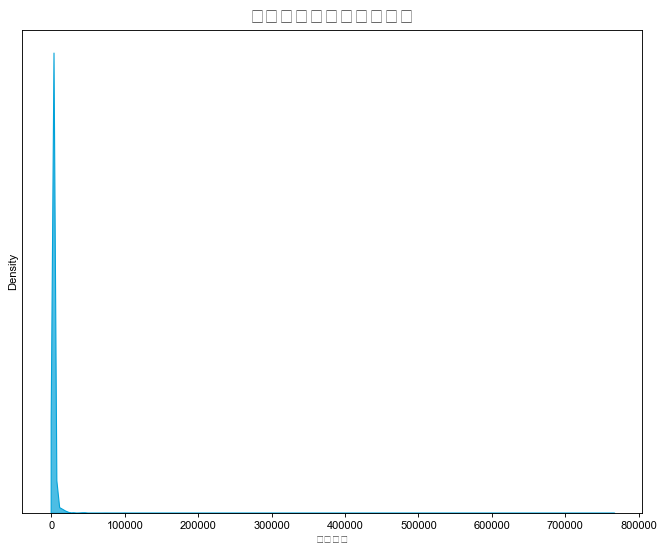

In [44]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi=80)
# 绘图
sns.kdeplot(data.loc[:,'订单金额'],
           shade=True,
           color="#01a2d9",
           label = '订单金额',
           alpha = .7)
# 风格与装饰
sns.set(style="whitegrid", font_scale=1.1)
plt.title('订单金额概率密度分布图',fontsize = 18)
plt.yticks([])
plt.show()

F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21806 (\N{CJK UNIFIED IDEOGRAPH-552E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\anaconda\lib\site-packages\IPython\core\pylabtools.p

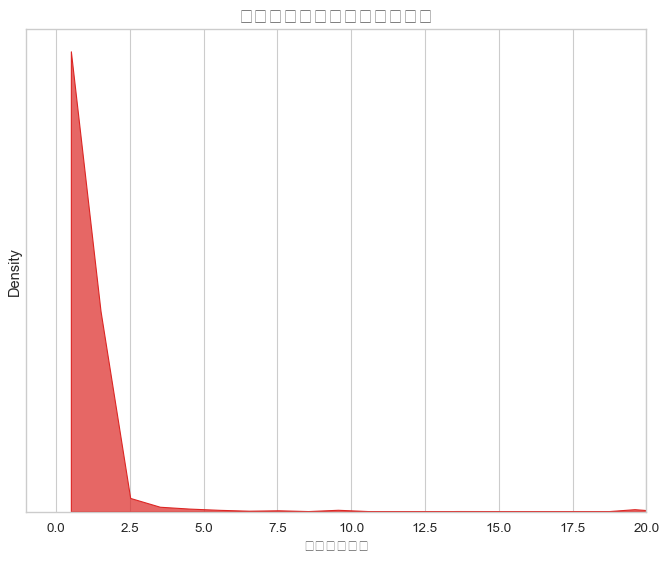

In [48]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(data.loc[:, "商品销售数量"],
            shade=True,
            color="#dc2624",
            label="商品销售数量",
            alpha=.7)
#风格与装饰
sns.set(style="whitegrid", font_scale=1.1)
plt.title("商品销售数量概率密度分布图",fontsize=18)
plt.yticks([])
plt.xlim((-1,20))
#plt.xlim((-1,5))
plt.show()

### 依据二：箱线图法则

In [49]:
# 进行异常值检测，并保存特征异常的样本的索引
NumOfSamples = data.shape[0]
DataNoAbnormal = data.copy()
BoxAbnormalIdx = []  # 列表：用于保存特征异常的样本的索引
for idx, column in enumerate(['订单金额','商品销售数量']):
    feature = data[column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    # 过小或过大的都属于异常值
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)

In [50]:
len(BoxAbnormalIdx)

31266

In [51]:
BoxAbnormalIdx = set(BoxAbnormalIdx)
len(BoxAbnormalIdx)

29949

In [52]:
len(BoxAbnormalIdx) / data.shape[0]

0.22812723754970216

In [53]:
(data['异常'] == 1).sum()

28284

In [54]:
(data.loc[BoxAbnormalIdx,"异常"] == 1).sum() / (data['异常'] == 1).sum()

C:\Users\zx\AppData\Local\Temp\ipykernel_5848\3197636292.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  (data.loc[BoxAbnormalIdx,"异常"] == 1).sum() / (data['异常'] == 1).sum()


0.2605006364022062

In [55]:
df = pd.DataFrame(index=data.index)
df['特征异常'] = 0  # 新增列"特征异常"，初始值为0
df.loc[BoxAbnormalIdx, '特征异常'] = 1
pd.concat([df['特征异常'],data['异常']],axis=1).corr()

C:\Users\zx\AppData\Local\Temp\ipykernel_5848\765719540.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[BoxAbnormalIdx, '特征异常'] = 1


,特征异常,异常
特征异常,1.000000,0.040428
异常,0.040428,1.000000


In [56]:
data.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [57]:
data.to_csv('abnormal_orders2.csv')